In [1]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 125.5, -0.5))

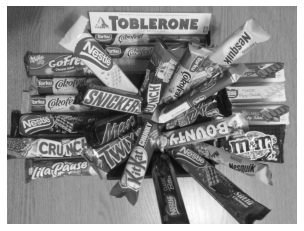

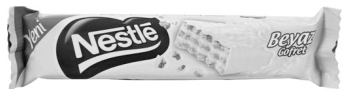

In [3]:
# ana görüntü içe aktar
chos = cv2.imread("chocolates.jpg", 0)
plt.figure(), plt.imshow(chos, cmap = "gray"), plt.axis("off")

# Aranacak olan görüntü
cho = cv2.imread("nestle.jpg", 0)
plt.figure(), plt.imshow(cho, cmap = "gray"), plt.axis("off")


(<matplotlib.image.AxesImage at 0x1d7de1e60a0>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'orb'))

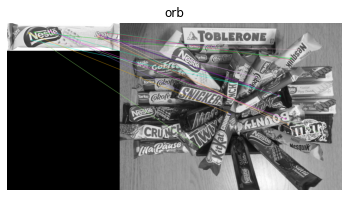

In [4]:
# orb tanımlayıcısı
# Köşe kenar gibi nesneye ait özellikler
orb = cv2.ORB_create()

# Anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

# bf matcher
bf = cv2. BFMatcher(cv2.NORM_HAMMING)
# Noktaları eşleştir
matches = bf.match(des1, des2)
# mesafeye göre sırala
matches = sorted(matches, key = lambda x: x.distance)
# Eşleşen resimleri görselleştirelim
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis("off"),plt.title("orb")

In [5]:
# sift
sift = cv2.xfeatures2d.SIFT_create()

# bf
bf = cv2.BFMatcher()

# anahtar nokta tespiti sift ile
kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

matches = bf.knnMatch(des1, des2, k = 2)

guzel_eslesme = []

for match1, match2 in matches:
    
    if match1.distance < 0.75*match2.distance:
        guzel_eslesme.append([match1])
    
plt.figure()
sift_matches = cv2.drawMatchesKnn(cho,kp1,chos,kp2,guzel_eslesme,None, flags = 2)
plt.imshow(sift_matches), plt.axis("off"), plt.title("sift")

AttributeError: module 'cv2' has no attribute 'xfeatures2d'